#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Load your dataset
df = pd.read_csv("Salaries.csv")
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [3]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

# # 1- Basic Data Exploration:
Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


In [5]:
df.shape

(148654, 13)

1- There are 13 columns and 148654 rows

There are eight columns containing float data (BasePay, OvertimePay, OtherPay, Benefits, TotalPay, TotalPayBenefits) (Notes and Status are empty columns), three columns contain object data "String" (EmployeeName, JobTitle, Agency)
and two columns contain integer data (ID, Year)




In [6]:
df.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

In [7]:
df.duplicated().sum()

0

1- The columns named (Notes) and (Status) are empty.

2- There are many missing values in the columns named (BasePay) and (Benefits), I will replace them with zeros in the stage of data cleaning.

3- There are only 4 missing values in the columns named (OvertimePay) and (OtherPay)

4- There is no duplicated data

## 2- Data Cleaning:
Handle missing data by suitable method with explain why you use it.

In [8]:
# First I will get rid of the empty columns
df.drop(df.columns[[10, 12]], axis = 1, inplace = True)

# CCheck for empty cells
df.isnull().sum()

Id                      0
EmployeeName            0
JobTitle                0
BasePay               609
OvertimePay             4
OtherPay                4
Benefits            36163
TotalPay                0
TotalPayBenefits        0
Year                    0
Agency                  0
dtype: int64

In [9]:
# Replacing Null values with zeros
df.fillna(0, inplace=True)

In [10]:
# Check for empty cells
df.isnull().sum()

Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
dtype: int64

Now there is no data missing

** I dropped the empty cells by dropping entire columns (Notes, Sataus) with (inplace = True) to remove the empty columns from the original data frame

** I did not use the dropna method because it deletes rows containing empty values, and thus will delete the entire data

** I Filled the Null Vales with Zero, thus I can deal with them as numeric values.

## 3- Descriptive Statistics: 
Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

In [11]:
df.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
count,148654.000000,148654.000000,148654.000000,148654.000000,148654.000000,148654.000000,148654.000000,148654.000000
mean,74327.500000,66053.729288,5065.923568,3648.669115,18924.232839,74768.321972,93692.554811,2012.522643
std,42912.857795,42886.711158,11454.256594,8056.515703,17165.279495,50517.005274,62793.533483,1.117538
min,1.000000,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000
25%,37164.250000,32792.545000,0.000000,0.000000,0.000000,36168.995000,44065.650000,2012.000000
50%,74327.500000,64861.600000,0.000000,811.170000,23214.020000,71426.610000,92404.090000,2013.000000
75%,111490.750000,94605.740000,4657.632500,4235.907500,33468.980000,105839.135000,132876.450000,2014.000000
max,148654.000000,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000


In my opinion, there is an error here because no salary is negative or zero, so I will drop the negative values in the columns named (BasePay, OvertimePay, Benefities, TotalPay, otherpay)

I will also remove zero values in the (BasePay, and Totalpay) columns.

In [12]:
df.query('BasePay < 0')

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
72832,72833,Irwin Sidharta,Junior Clerk,-166.01,249.02,0.0,6.56,83.01,89.57,2012,San Francisco
72865,72866,Robert Scott,Junior Clerk,-121.63,182.70,0.0,5.44,61.07,66.51,2012,San Francisco
72872,72873,Chung Huey Kung,Junior Clerk,-109.22,163.83,0.0,4.32,54.61,58.93,2012,San Francisco
72874,72875,Jordan Li,Junior Clerk,-106.60,159.90,0.0,4.66,53.30,57.96,2012,San Francisco
72878,72879,Richard Jackson,Junior Clerk,-101.88,153.08,0.0,4.55,51.20,55.75,2012,San Francisco
72884,72885,DiMarco McGhee-Stewart,Junior Clerk,-93.14,139.97,0.0,4.17,46.83,51.00,2012,San Francisco
72888,72889,Leopoldo Marasigan,Junior Clerk,-87.38,131.06,0.0,3.89,43.68,47.57,2012,San Francisco
72894,72895,Douglas Avalos,Junior Clerk,-75.67,113.76,0.0,3.39,38.09,41.48,2012,San Francisco
72908,72909,Norma Rodriguez,Junior Clerk,-59.59,89.65,0.0,2.68,30.06,32.74,2012,San Francisco
72920,72921,Charles Williams,Junior Clerk,-30.58,45.87,0.0,1.36,15.29,16.65,2012,San Francisco


In [13]:
df = df[df['BasePay'] > 0]
df = df[df['OvertimePay'] >= 0]
df = df[df['Benefits'] >= 0]
df = df[df['TotalPay'] >= 0]
df = df[df['OtherPay'] >= 0]

In [14]:
df.query('BasePay <= 0')

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency


In [15]:
df.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
count,146731.000000,146731.000000,146731.000000,146731.000000,146731.000000,146731.000000,146731.000000,146731.000000
mean,74115.562499,66917.299803,5130.770689,3638.567451,19142.458646,75686.637943,94829.096589,2012.522555
std,42906.558077,42491.910280,11513.671302,7964.235378,17165.696198,50175.495799,62385.542906,1.118021
min,1.000000,6.040000,0.000000,0.000000,0.000000,15.500000,15.660000,2011.000000
25%,37135.500000,35410.810000,0.000000,0.000000,0.000000,38781.165000,47047.365000,2012.000000
50%,74249.000000,65258.010000,0.000000,809.940000,23934.520000,72094.120000,93298.840000,2013.000000
75%,111541.500000,94984.075000,4768.270000,4250.435000,33569.415000,106492.075000,133527.915000,2014.000000
max,148621.000000,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000


In [16]:
# I will assume that the net salaries are represented in the column named (TotalPay)
# The range of salaries = Max - Min
Range_Salaries = df["TotalPay"].max() - df["TotalPay"].min()
Range_Salaries

567579.93

In [17]:
mean = int(df["TotalPay"].mean())
median =int(df["TotalPay"].median())
mode = float(df["TotalPay"].mode())
minimum = df["TotalPay"].min()
maximum = df["TotalPay"].max()

print(f"Mean = {mean} \nMedian = {median} \nMode = {mode} \nMin = {minimum} \nMax = {maximum}")

Mean = 75686 
Median = 72094 
Mode = 18594.0 
Min = 15.5 
Max = 567595.43


## 4- Basic Data Visualization: 
Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

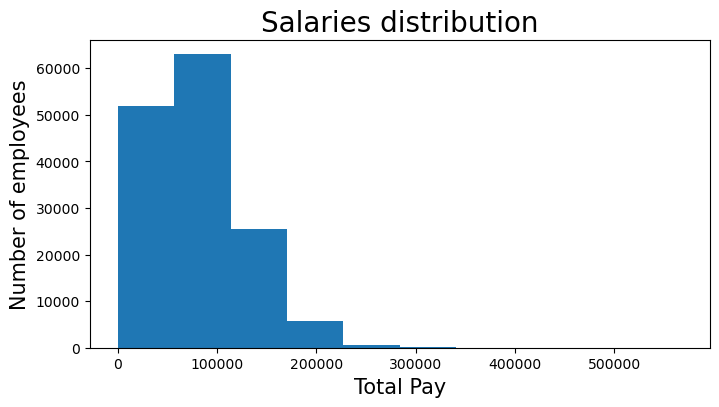

In [18]:
# create the histogram and determine its size
plt.figure(figsize=[8,4])

hist = df['TotalPay'].plot(kind='hist')

# Setting labels and the title
plt.xlabel('Total Pay', fontsize= 15)
plt.ylabel('Number of employees', fontsize=15)
plt.title('Salaries distribution', fontsize=20)

# Print the figure
plt.show()

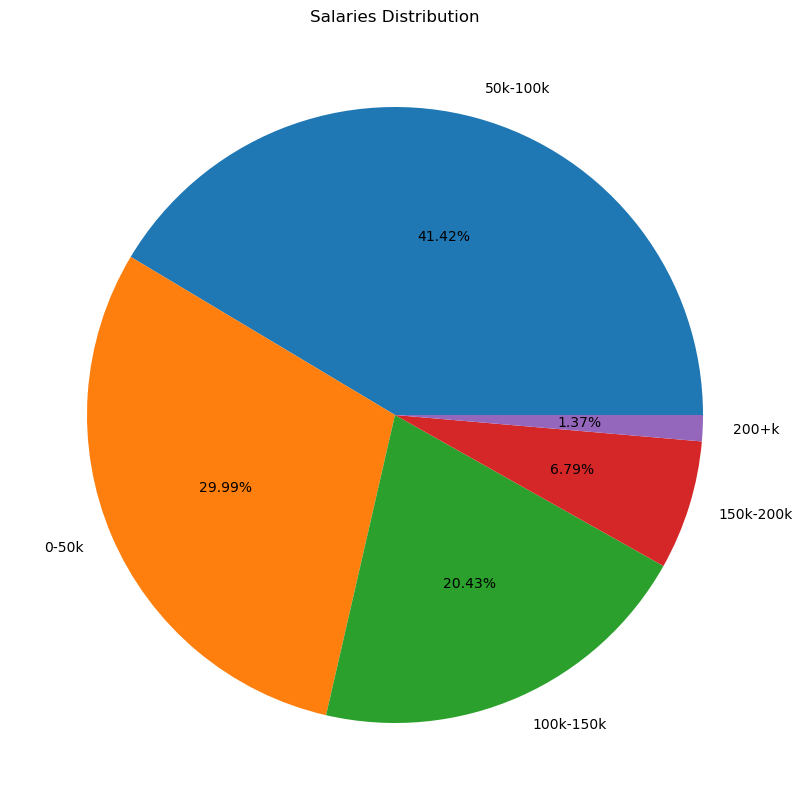

In [19]:
# First, I will determine the cut points of the different parts and set the labels
cut_points = [0, 50000, 100000, 150000, 200000, float('inf')]
labels = ['0-50k', '50k-100k', '100k-150k', '150k-200k', '200+k']

# Then I will create a new column with the new parts
df['salary_parts'] = pd.cut(df['TotalPay'], bins=cut_points, labels=labels)

# I will calculate the percentage of employees in each department
salary_distribution = df['salary_parts'].value_counts()


# Creating the pie chart
plt.figure(figsize=(10, 10))
plt.pie(salary_distribution, labels=salary_distribution.index, autopct='%1.2f%%')
plt.title('Salaries Distribution')
plt.show()

In [20]:
mean = int(df["TotalPay"].mean()) 
median = int(df["TotalPay"].median())

print(f"Mean = {mean} \nMedian = {median}")

Mean = 75686 
Median = 72094


We notice from the above charts that about 41 % of the employees get Salaries between 50k to 100k

That can be noticed also in the mean and the median


## 5- Grouped Analysis: 
Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

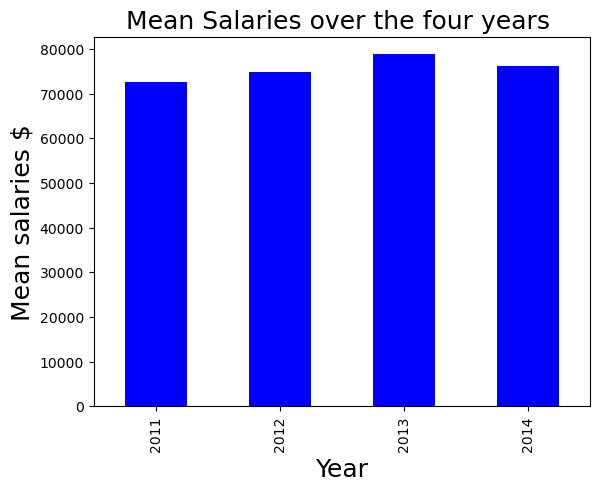

In [21]:
# I will investigate the mean of salaries over the four years.

# Calculate average salaries for each year
df.groupby(["Year"]).mean()["TotalPay"].plot(kind = "bar", color = "blue")

# Creating the graph
plt.title("Mean Salaries over the four years ", fontsize = 18)
plt.xlabel("Year", fontsize = 18)
plt.ylabel("Mean salaries $", fontsize = 18);

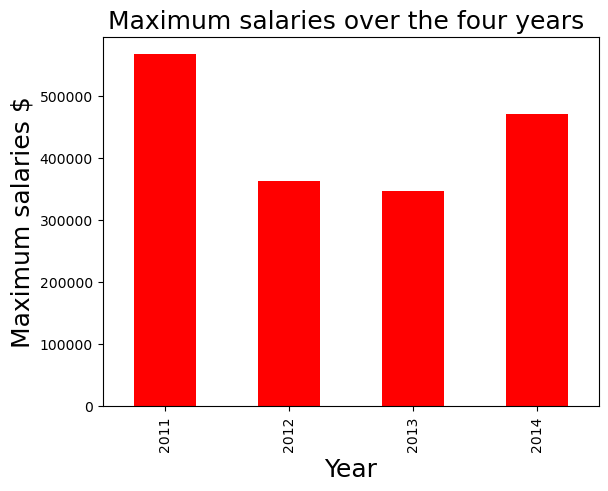

In [22]:
# Calculate max salaries for each year
df.groupby(["Year"]).max()["TotalPay"].plot(kind = "bar", color = "red")

# Creating the graph
plt.title("Maximum salaries over the four years ", fontsize = 18)
plt.xlabel("Year", fontsize = 18)
plt.ylabel("Maximum salaries $", fontsize = 18);

From the previous grouped analysis, it was found that there is no significant difference between the average salaries in the four years.

The salary max was high in 2011 and 2014.

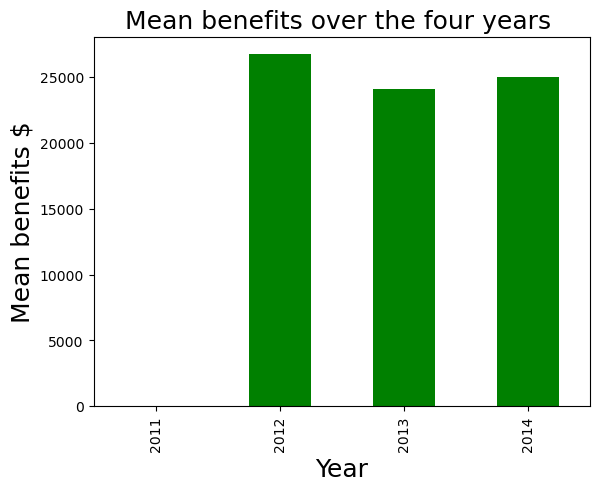

In [23]:
# I will investigate the mean benefits over the four years.
df.groupby(["Year"]).mean()["Benefits"].plot(kind = "bar", color = "green")

# Creating the graph
plt.title("Mean benefits over the four years ", fontsize = 18)
plt.xlabel("Year", fontsize = 18)
plt.ylabel("Mean benefits $", fontsize = 18);

From the previous grouped analysis, it was found that there is no significant difference between the average benefits in the last three years. Still, we noticed that employees did not receive benefits in 2011.

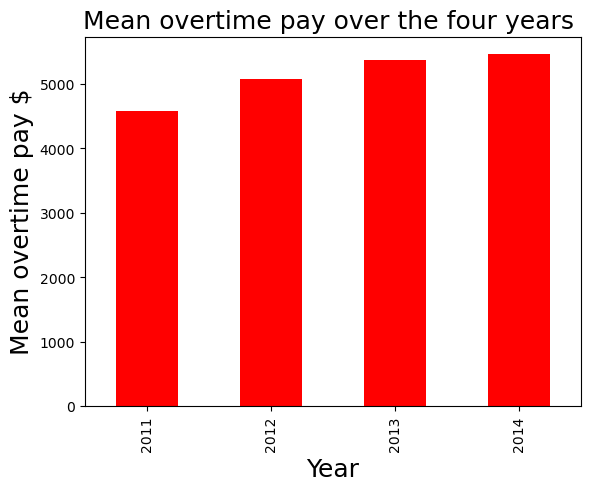

In [24]:
# I will investigate the mean overtime pay over the four years.
df.groupby(["Year"]).mean()["OvertimePay"].plot(kind = "bar", color = "red")

# Creating the graph
plt.title("Mean overtime pay over the four years ", fontsize = 18)
plt.xlabel("Year", fontsize = 18)
plt.ylabel("Mean overtime pay $", fontsize = 18);

From the previous grouped analysis, it was found that the average overtime pay increase gradually over the four years.

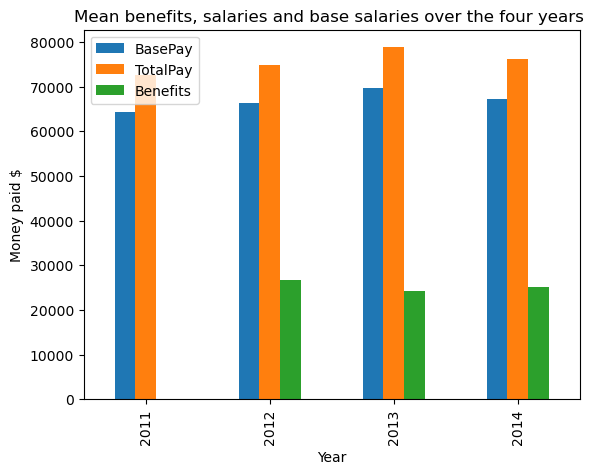

In [25]:
# I will investigate the mean benefits, Salaries, and base salaries, and if there is a relationship between them.
df.groupby(["Year"]).mean()[["BasePay", "TotalPay", "Benefits"]].plot(kind = "bar")

# Creating the graph
plt.title("Mean benefits, salaries and base salaries over the four years ", fontsize = 12)
plt.xlabel("Year", fontsize = 10)
plt.ylabel("Money paid $", fontsize = 10);

There is no relation between the three parameters (benefits, salaries and base salaries)

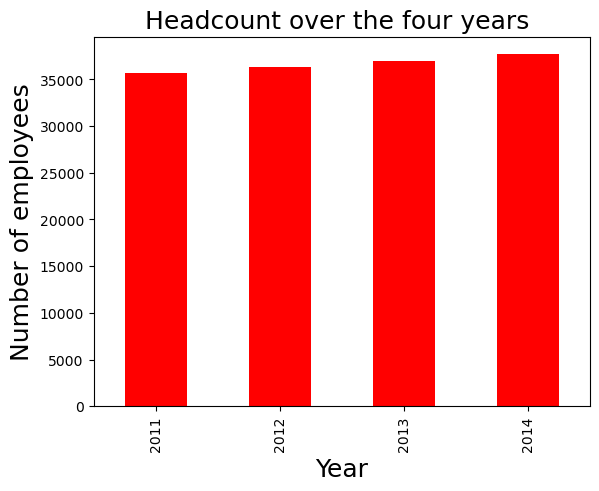

In [26]:
#I will investigate headcount over the four years.
df.groupby(["Year"]).count()["EmployeeName"].plot(kind = "bar", color = "red")

# Creating the graph
plt.title("Headcount over the four years ", fontsize = 18)
plt.xlabel("Year", fontsize = 18)
plt.ylabel("Number of employees", fontsize = 18);

The agency has maintained an almost constant number of employees over the four years

## 6-Simple Correlation Analysis:
Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.



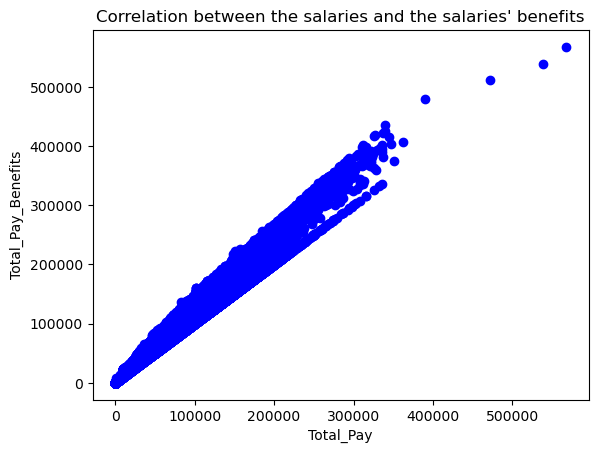

In [27]:
# I will investigate the correlation between the salaries and the salaries' benefits
plt.scatter(df['TotalPay'], df['TotalPayBenefits'], color = "blue")

# Setting labels and title
plt.xlabel('Total_Pay')
plt.ylabel('Total_Pay_Benefits')
plt.title("Correlation between the salaries and the salaries' benefits")

# Show the plot
plt.show()

From the previous figure, There is a strong positive correlation between (salaries) and (salaries benefits)

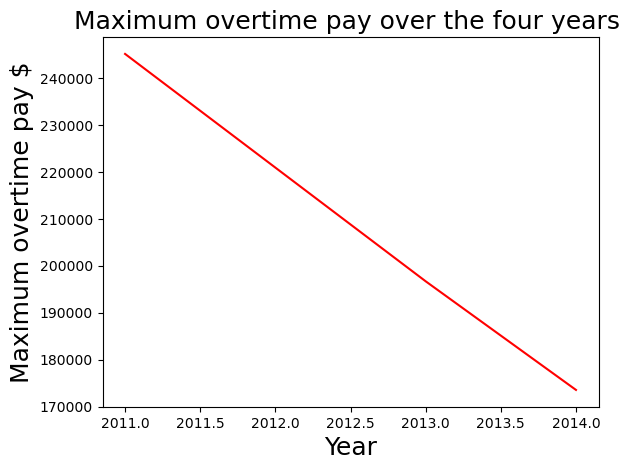

In [28]:
df.groupby(["Year"]).max()["OvertimePay"].plot(kind = "line", color = "red")

plt.title("Maximum overtime pay over the four years ", fontsize = 18)
plt.xlabel("Year", fontsize = 18)
plt.ylabel("Maximum overtime pay $", fontsize = 18);

From the previous figure, There is a strong negative correlation between (salaries) and (salaries benefits)

## 8- Summary of Insights: 
Write a brief report summarizing the findings and insights from the analyses.

### Conclusion:

1- Almost 41 % of the employees get Salaries between 50k to 100k -( mean = 75686)- and 30 % get Salaries between 0k to 50k.

2-There is no significant difference between the average salaries in the four years, The salary max was high in 2011 and 2014

3-There is no significant difference between the average benefits in the last three years, but the employees did not receive any benefits in 2011.

4-The average overtime pay increases gradually over the four years.

5-The agency has maintained an almost constant number of employees over the four years.

6-There is a strong positive correlation between (salaries) and (salaries benefits)

7-There is a strong negative correlation between (salaries) and (salaries' benefits)

# Good Luck!